<a href="https://colab.research.google.com/github/robertocsa/Colab_Compartilhamentos/blob/main/Convolucoes_aplicadas_em_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Célula 1: Importação das bibliotecas necessárias
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Função para exibir imagens em uma grade
def display_images(images, titles, rows, cols, figsize=(10, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()
    for i in range(len(images)):
        axes[i].imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


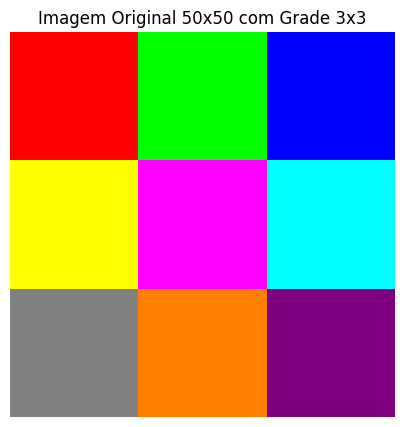

In [4]:
# Célula 2: Criação da imagem 50x50 com tabuleiro 3x3 colorido
# Definindo as dimensões da imagem
height, width = 45, 45
grid_size = 3  # Grade 3x3
cell_height, cell_width = height // grid_size, width // grid_size

# Criando uma imagem colorida vazia (RGB)
image = np.zeros((height, width, 3), dtype=np.uint8)

# Definindo cores diferentes para cada célula da grade 3x3
colors = [
    (255, 0, 0),    # Vermelho
    (0, 255, 0),    # Verde
    (0, 0, 255),    # Azul
    (255, 255, 0),  # Amarelo
    (255, 0, 255),  # Magenta
    (0, 255, 255),  # Ciano
    (128, 128, 128),# Cinza
    (255, 128, 0),  # Laranja
    (128, 0, 128)   # Roxo
]

# Preenchendo a grade com cores
for i in range(grid_size):
    for j in range(grid_size):
        color = colors[i * grid_size + j]
        image[i * cell_height:(i + 1) * cell_height, j * cell_width:(j + 1) * cell_width] = color

# Exibindo a imagem original
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title('Imagem Original 50x50 com Grade 3x3')
plt.axis('off')
plt.show()


In [64]:
# Célula 3: Definição dos kernels de convolução
# Lista de kernels para diferentes efeitos
kernels = {
    'Detecção de Bordas (Simples)': np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ]),
    'Sobel Horizontal': np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]),
    'Sobel Vertical': np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ]),
    'Desfoque (Blur)': np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ]),
    'Nitidez (Sharpen)': np.array([
        [ 0, -1,  0],
        [-1,  5, -1],
        [ 0, -1,  0]
    ]),
    'Detecção de Bordas (Laplaciano)': np.array([
        [ 0,  1,  0],
        [ 1, -4,  1],
        [ 0,  1,  0]
    ]),
    'Emboss': np.array([
        [-2, -1,  0],
        [-1,  1,  1],
        [ 0,  1,  2]
    ]),
    'Borda Horizontal (RCS)': np.array([
        [-1, -1, -1],
        [2,  2,  2],
        [ -1, -1, -1]
    ]),
    'Borda Vertical (RCS)': np.array([
        [-1, 2,  -1],
        [-1,  2,  -1],
        [ -1,  2,  -1]
    ]),
    '1Criada aleatrmente p/ mim (RCS)': np.array([
        [2, 1,  0],
        [-1,  5,  1],
        [ 0,  1,  2]
    ]),
    '2Criada aleatrmnte p/ mim (RCS)': np.array([
        [2, 1,  2],
        [1,  -5,  -1],
        [ 2,  -1,  2]
    ]),
}

In [26]:
# Célula 4: Função para aplicar convolução em cada canal RGB
def apply_convolution(image, kernel):
    # Separando os canais RGB
    r, g, b = cv2.split(image)

    # Aplicando convolução em cada canal
    r_conv = convolve2d(r, kernel, mode='same', boundary='symm')
    g_conv = convolve2d(g, kernel, mode='same', boundary='symm')
    b_conv = convolve2d(b, kernel, mode='same', boundary='symm')

    # Normalizando os valores para o intervalo [0, 255]
    r_conv = np.clip(r_conv, 0, 255).astype(np.uint8)
    g_conv = np.clip(g_conv, 0, 255).astype(np.uint8)
    b_conv = np.clip(b_conv, 0, 255).astype(np.uint8)

    # Recombinando os canais
    result = cv2.merge((r_conv, g_conv, b_conv))
    return result, r_conv, g_conv, b_conv


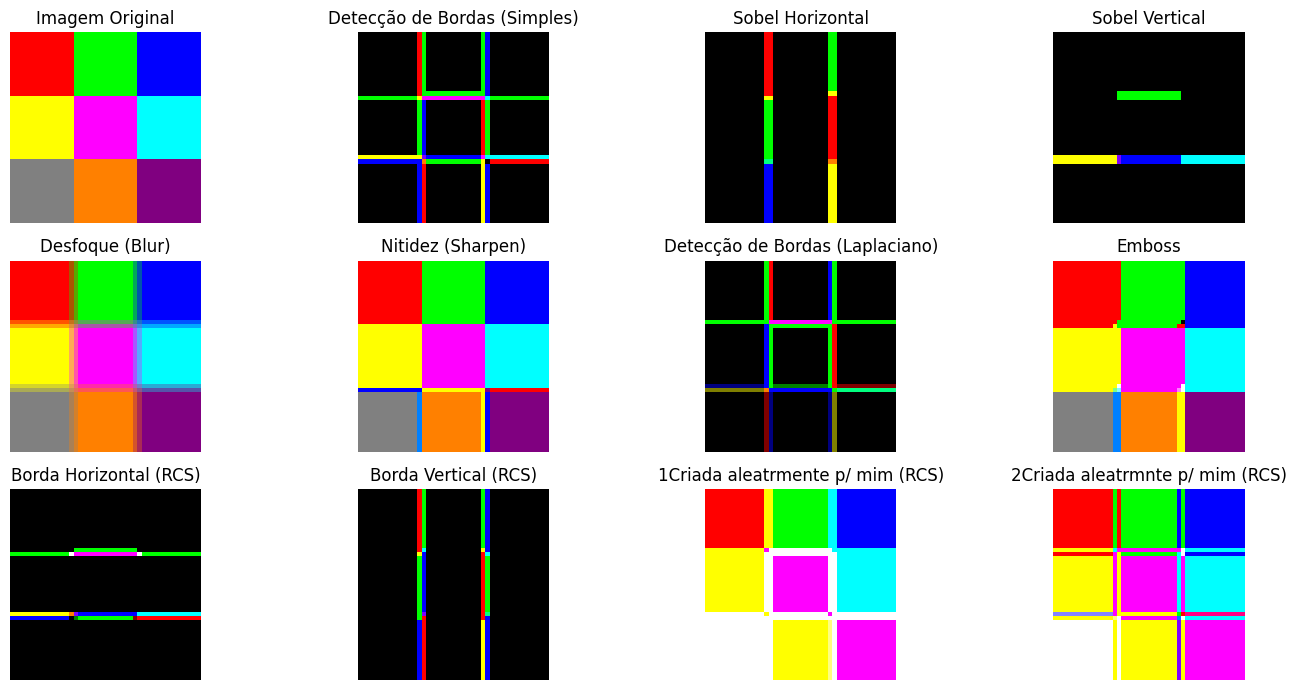

In [27]:
# Célula 5: Aplicação das convoluções e geração de imagens intermediárias
# Lista para armazenar imagens processadas
processed_images = [image]
titles = ['Imagem Original']

# Aplicando cada kernel e armazenando os resultados
for name, kernel in kernels.items():
    result, _, _, _ = apply_convolution(image, kernel)
    processed_images.append(result)
    titles.append(name)

# Exibindo as imagens intermediárias
display_images(processed_images, titles, 3, 4, figsize=(15, 7))

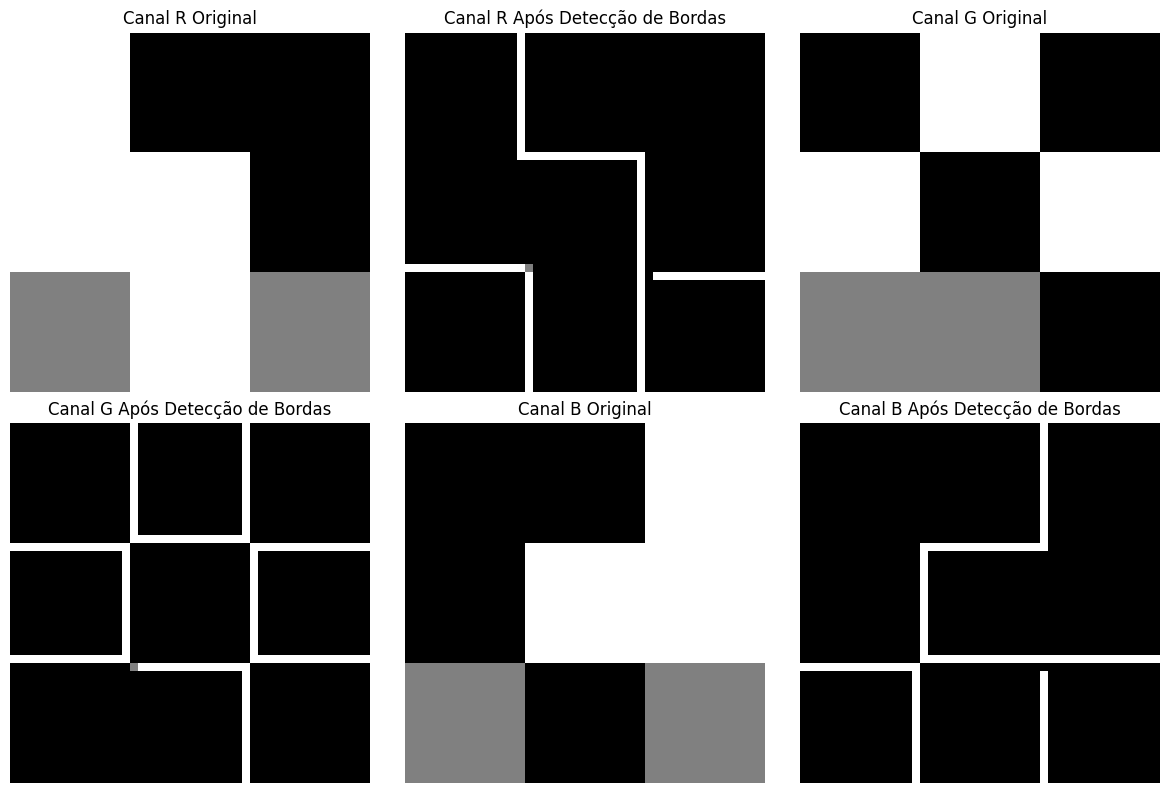

In [12]:
# Célula 6: Exibição dos canais RGB antes e depois da convolução de detecção de bordas
# Separando os canais RGB da imagem original
r_orig, g_orig, b_orig = cv2.split(image)

# Aplicando a convolução de detecção de bordas
kernel_edge = kernels['Detecção de Bordas (Simples)']
_, r_conv, g_conv, b_conv = apply_convolution(image, kernel_edge)

# Lista de imagens para exibição
channels = [r_orig, r_conv, g_orig, g_conv, b_orig, b_conv]
channel_titles = [
    'Canal R Original',
    'Canal R Após Detecção de Bordas',
    'Canal G Original',
    'Canal G Após Detecção de Bordas',
    'Canal B Original',
    'Canal B Após Detecção de Bordas'
]

# Exibindo os canais separadamente
display_images(channels, channel_titles, 2, 3, figsize=(12, 8))

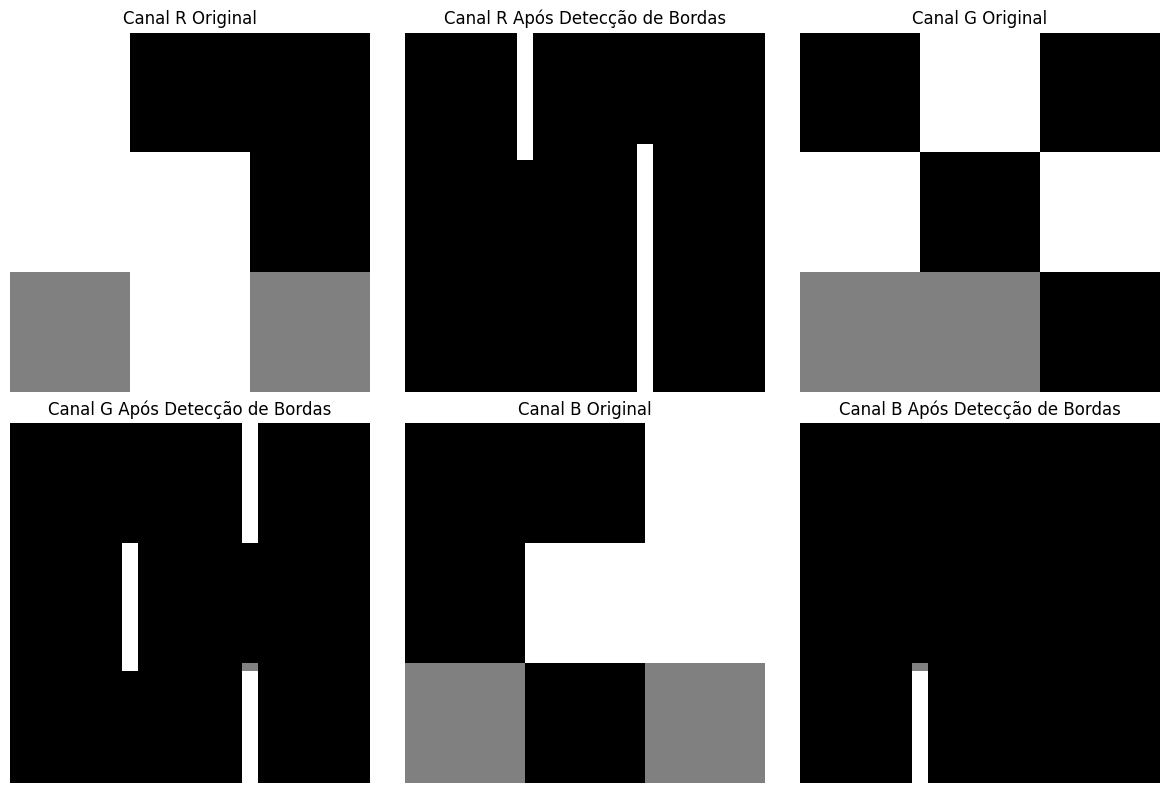

In [24]:
# Célula 6: Exibição dos canais RGB antes e depois da convolução de detecção de bordas
# Separando os canais RGB da imagem original
r_orig, g_orig, b_orig = cv2.split(image)

# Aplicando a convolução de detecção de bordas
kernel_edge = kernels['Sobel Horizontal']
_, r_conv, g_conv, b_conv = apply_convolution(image, kernel_edge)

# Lista de imagens para exibição
channels = [r_orig, r_conv, g_orig, g_conv, b_orig, b_conv]
channel_titles = [
    'Canal R Original',
    'Canal R Após Detecção de Bordas',
    'Canal G Original',
    'Canal G Após Detecção de Bordas',
    'Canal B Original',
    'Canal B Após Detecção de Bordas'
]

# Exibindo os canais separadamente
display_images(channels, channel_titles, 2, 3, figsize=(12, 8))

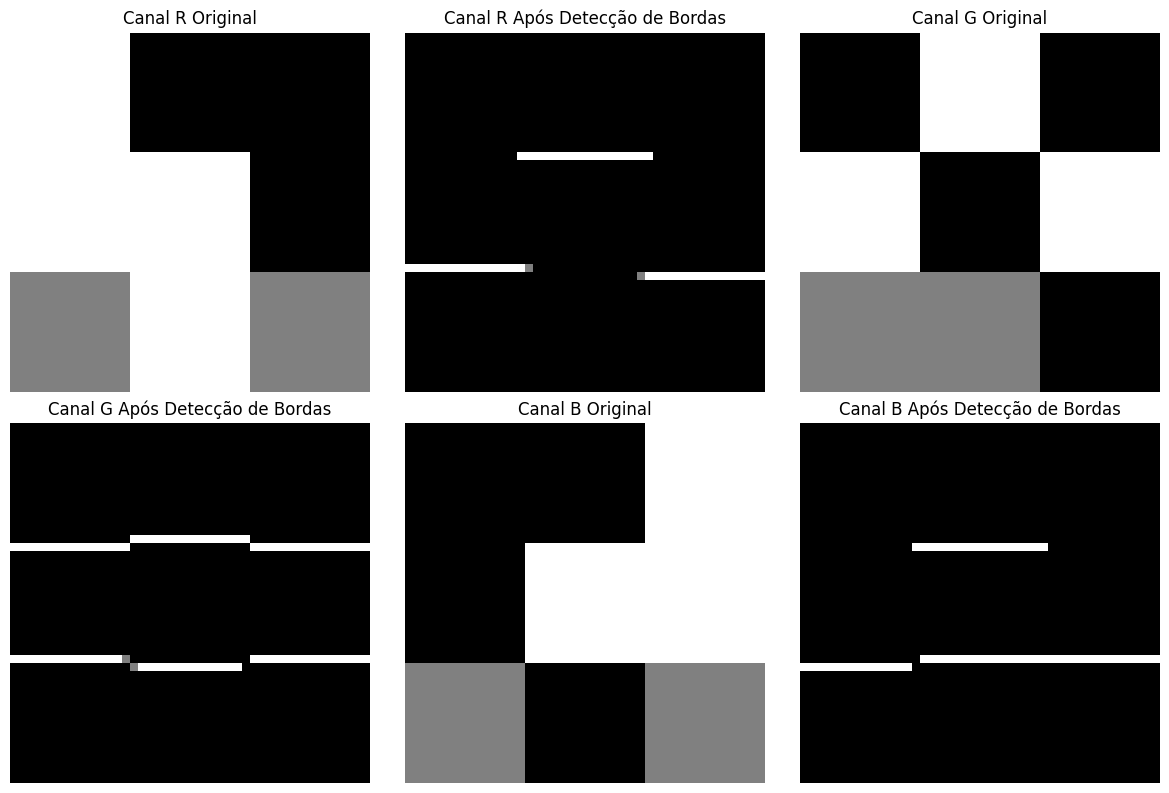

In [28]:
# Célula 6: Exibição dos canais RGB antes e depois da convolução de detecção de bordas
# Separando os canais RGB da imagem original
r_orig, g_orig, b_orig = cv2.split(image)

# Aplicando a convolução de detecção de bordas
kernel_edge = kernels['Borda Horizontal (RCS)']
_, r_conv, g_conv, b_conv = apply_convolution(image, kernel_edge)

# Lista de imagens para exibição
channels = [r_orig, r_conv, g_orig, g_conv, b_orig, b_conv]
channel_titles = [
    'Canal R Original',
    'Canal R Após Detecção de Bordas',
    'Canal G Original',
    'Canal G Após Detecção de Bordas',
    'Canal B Original',
    'Canal B Após Detecção de Bordas'
]

# Exibindo os canais separadamente
display_images(channels, channel_titles, 2, 3, figsize=(12, 8))

In [34]:
# Célula 7: Carregamento de uma imagem PNG para convoluções

# Importar a funcionalidade de upload de arquivos do Google Colab
from google.colab import files

# Função para carregar e preparar a imagem
def load_png_image():
    # Carregando o arquivo PNG
    uploaded = files.upload()
    if not uploaded:
        print("Nenhum arquivo foi carregado.")
        return None

    # Pegando o primeiro arquivo carregado
    file_name = list(uploaded.keys())[0]
    image_data = uploaded[file_name]

    # Convertendo os dados para uma imagem
    nparr = np.frombuffer(image_data, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    if img is None:
        print("Erro ao carregar a imagem. Verifique se é um arquivo PNG válido.")
        return None

    # Convertendo de BGR (padrão do OpenCV) para RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Garantindo que a imagem está no formato uint8
    img_rgb = img_rgb.astype(np.uint8)

    # Exibindo a imagem carregada
    plt.figure(figsize=(5, 5))
    plt.imshow(img_rgb)
    plt.title('Imagem PNG Carregada')
    plt.axis('off')
    plt.show()

    return img_rgb

# Carregando a imagem
loaded_image = load_png_image()

# Verificando se a imagem foi carregada corretamente antes de usá-la
if loaded_image is not None:
    print("Imagem carregada com sucesso, pronta para convoluções!")
    # A variável `loaded_image` pode ser usada nas convoluções, substituindo `image` nas células seguintes
else:
    print("Falha ao carregar a imagem. Use a imagem original para as convoluções.")

Saving FotoRCSSemCDC.jpg to FotoRCSSemCDC.jpg


Imagem carregada com sucesso, pronta para convoluções!


In [45]:
# Célula 5: Aplicação das convoluções e geração de imagens intermediárias
# Lista para armazenar imagens processadas
image = loaded_image
processed_images = [image]
titles = ['Imagem Original']

# Aplicando cada kernel e armazenando os resultados
for name, kernel in kernels.items():
    result, _, _, _ = apply_convolution(image, kernel)
    processed_images.append(result)
    titles.append(name)

# Exibindo as imagens intermediárias
display_images(processed_images, titles, 6, 2, figsize=(18, 24))

### Demonstração Matemática das Convoluções com Exemplos Aleatórios ###

Para cada kernel, geramos uma matriz 3x3 (canal R) e calculamos a convolução
em **todas as células**, exibindo: a) Matriz original, b) Kernel, c) Resultado completo.


**Detecção de Bordas (Simples)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Detecção de Bordas (Simples)):
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]

Cálculo detalhado por célula:
Pixel (0,0): 25×-1 + 25×-1 + 25×-1 + 25×-1 + 25×8 + 25×-1 + 45×-1 + 45×-1 + 45×-1 = 60
Pixel (0,1): 25×-1 + 25×-1 + 75×-1 + 25×-1 + 25×8 + 75×-1 + 45×-1 + 45×-1 + 80×-1 = 195
Pixel (0,2): 25×-1 + 75×-1 + 75×-1 + 25×-1 + 75×8 + 75×-1 + 45×-1 + 80×-1 + 80×-1 = 120
Pixel (1,0): 25×-1 + 25×-1 + 25×-1 + 45×-1 + 45×8 + 45×-1 + 55×-1 + 55×-1 + 55×-1 = 30
Pixel (1,1): 25×-1 + 25×-1 + 75×-1 + 45×-1 + 45×8 + 80×-1 + 55×-1 + 55×-1 + 90×-1 = 90
Pixel (1,2): 25×-1 + 75×-1 + 75×-1 + 45×-1 + 80×8 + 80×-1 + 55×-1 + 90×-1 + 90×-1 = 105
Pixel (2,0): 45×-1 + 45×-1 + 


**Sobel Horizontal**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Sobel Horizontal):
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Cálculo detalhado por célula:
Pixel (0,0): 25×-1 + 25×0 + 25×1 + 25×-2 + 25×0 + 25×2 + 45×-1 + 45×0 + 45×1 = 0
Pixel (0,1): 25×-1 + 25×0 + 75×1 + 25×-2 + 25×0 + 75×2 + 45×-1 + 45×0 + 80×1 = 185
Pixel (0,2): 25×-1 + 75×0 + 75×1 + 25×-2 + 75×0 + 75×2 + 45×-1 + 80×0 + 80×1 = 185
Pixel (1,0): 25×-1 + 25×0 + 25×1 + 45×-2 + 45×0 + 45×2 + 55×-1 + 55×0 + 55×1 = 0
Pixel (1,1): 25×-1 + 25×0 + 75×1 + 45×-2 + 45×0 + 80×2 + 55×-1 + 55×0 + 90×1 = 155
Pixel (1,2): 25×-1 + 75×0 + 75×1 + 45×-2 + 80×0 + 80×2 + 55×-1 + 90×0 + 90×1 = 155
Pixel (2,0): 45×-1 + 45×0 + 45×1 + 55×-2 + 55×0 + 55×2 + 55×-1 + 55×0 + 55×1 = 0
Pixel (2,1): 45×-1 + 45×0 + 80×1 + 55×-2 + 55×0 + 90×2 + 55×-1 + 55×0 + 90×1 = 140
Pixel (2,2): 45×-1 + 80×0 + 80×1 + 55×-2 + 90×0 + 90×2 + 55×-1 + 90×0 + 90×1 = 140



**Sobel Vertical**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Sobel Vertical):
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

Cálculo detalhado por célula:
Pixel (0,0): 25×-1 + 25×-2 + 25×-1 + 25×0 + 25×0 + 25×0 + 45×1 + 45×2 + 45×1 = 80
Pixel (0,1): 25×-1 + 25×-2 + 75×-1 + 25×0 + 25×0 + 75×0 + 45×1 + 45×2 + 80×1 = 65
Pixel (0,2): 25×-1 + 75×-2 + 75×-1 + 25×0 + 75×0 + 75×0 + 45×1 + 80×2 + 80×1 = 35
Pixel (1,0): 25×-1 + 25×-2 + 25×-1 + 45×0 + 45×0 + 45×0 + 55×1 + 55×2 + 55×1 = 120
Pixel (1,1): 25×-1 + 25×-2 + 75×-1 + 45×0 + 45×0 + 80×0 + 55×1 + 55×2 + 90×1 = 105
Pixel (1,2): 25×-1 + 75×-2 + 75×-1 + 45×0 + 80×0 + 80×0 + 55×1 + 90×2 + 90×1 = 75
Pixel (2,0): 45×-1 + 45×-2 + 45×-1 + 55×0 + 55×0 + 55×0 + 55×1 + 55×2 + 55×1 = 40
Pixel (2,1): 45×-1 + 45×-2 + 80×-1 + 55×0 + 55×0 + 90×0 + 55×1 + 55×2 + 90×1 = 40
Pixel (2,2): 45×-1 + 80×-2 + 80×-1 + 55×0 + 90×0 + 90×0 + 55×1 + 90×2 + 90×1 = 40



**Desfoque (Blur)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Desfoque (Blur)):
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Cálculo detalhado por célula:
Pixel (0,0): 25×0.1111111111111111 + 25×0.1111111111111111 + 25×0.1111111111111111 + 25×0.1111111111111111 + 25×0.1111111111111111 + 25×0.1111111111111111 + 45×0.1111111111111111 + 45×0.1111111111111111 + 45×0.1111111111111111 = 31
Pixel (0,1): 25×0.1111111111111111 + 25×0.1111111111111111 + 75×0.1111111111111111 + 25×0.1111111111111111 + 25×0.1111111111111111 + 75×0.1111111111111111 + 45×0.1111111111111111 + 45×0.1111111111111111 + 80×0.1111111111111111 = 46
Pixel (0,2): 25×0.1111111111111111 + 75×0.1111111111111111 + 75×0.1111111111111111 + 25×0.1111111111111111 + 75×0.1111111111111111 + 75×0.1111111111111111 + 45×0.1111111111111111 + 80×0.1111111111111111 + 80×0.1111111111111111 = 61
Pixel (1,0): 25×0.1111111111111111 + 25×0.1111111111

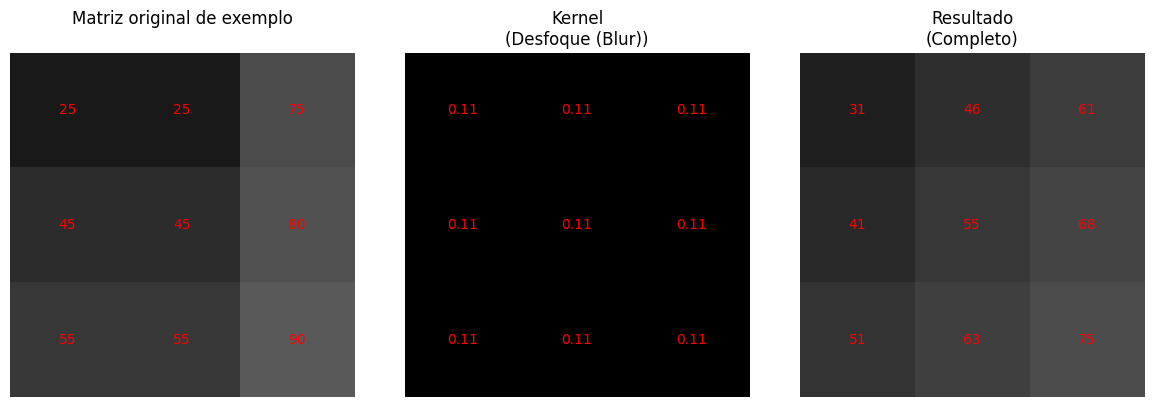


**Nitidez (Sharpen)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Nitidez (Sharpen)):
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

Cálculo detalhado por célula:
Pixel (0,0): 25×0 + 25×-1 + 25×0 + 25×-1 + 25×5 + 25×-1 + 45×0 + 45×-1 + 45×0 = 5
Pixel (0,1): 25×0 + 25×-1 + 75×0 + 25×-1 + 25×5 + 75×-1 + 45×0 + 45×-1 + 80×0 = 45
Pixel (0,2): 25×0 + 75×-1 + 75×0 + 25×-1 + 75×5 + 75×-1 + 45×0 + 80×-1 + 80×0 = 120
Pixel (1,0): 25×0 + 25×-1 + 25×0 + 45×-1 + 45×5 + 45×-1 + 55×0 + 55×-1 + 55×0 = 55
Pixel (1,1): 25×0 + 25×-1 + 75×0 + 45×-1 + 45×5 + 80×-1 + 55×0 + 55×-1 + 90×0 = 20
Pixel (1,2): 25×0 + 75×-1 + 75×0 + 45×-1 + 80×5 + 80×-1 + 55×0 + 90×-1 + 90×0 = 110
Pixel (2,0): 45×0 + 45×-1 + 45×0 + 55×-1 + 55×5 + 55×-1 + 55×0 + 55×-1 + 55×0 = 65
Pixel (2,1): 45×0 + 45×-1 + 80×0 + 55×-1 + 55×5 + 90×-1 + 55×0 + 55×-1 + 90×0 = 30
Pixel (2,2): 45×0 + 80×-1 + 80×0 + 55×-1 + 90×5 + 90×-1 + 55×0 + 90×-1 + 90×0 = 135



**Detecção de Bordas (Laplaciano)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Detecção de Bordas (Laplaciano)):
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]

Cálculo detalhado por célula:
Pixel (0,0): 25×0 + 25×1 + 25×0 + 25×1 + 25×-4 + 25×1 + 45×0 + 45×1 + 45×0 = 20
Pixel (0,1): 25×0 + 25×1 + 75×0 + 25×1 + 25×-4 + 75×1 + 45×0 + 45×1 + 80×0 = 70
Pixel (0,2): 25×0 + 75×1 + 75×0 + 25×1 + 75×-4 + 75×1 + 45×0 + 80×1 + 80×0 = 45
Pixel (1,0): 25×0 + 25×1 + 25×0 + 45×1 + 45×-4 + 45×1 + 55×0 + 55×1 + 55×0 = 10
Pixel (1,1): 25×0 + 25×1 + 75×0 + 45×1 + 45×-4 + 80×1 + 55×0 + 55×1 + 90×0 = 25
Pixel (1,2): 25×0 + 75×1 + 75×0 + 45×1 + 80×-4 + 80×1 + 55×0 + 90×1 + 90×0 = 30
Pixel (2,0): 45×0 + 45×1 + 45×0 + 55×1 + 55×-4 + 55×1 + 55×0 + 55×1 + 55×0 = 10
Pixel (2,1): 45×0 + 45×1 + 80×0 + 55×1 + 55×-4 + 90×1 + 55×0 + 55×1 + 90×0 = 25
Pixel (2,2): 45×0 + 80×1 + 80×0 + 55×1 + 90×-4 + 90×1 + 55×0 + 90×1 + 90×0 = 45


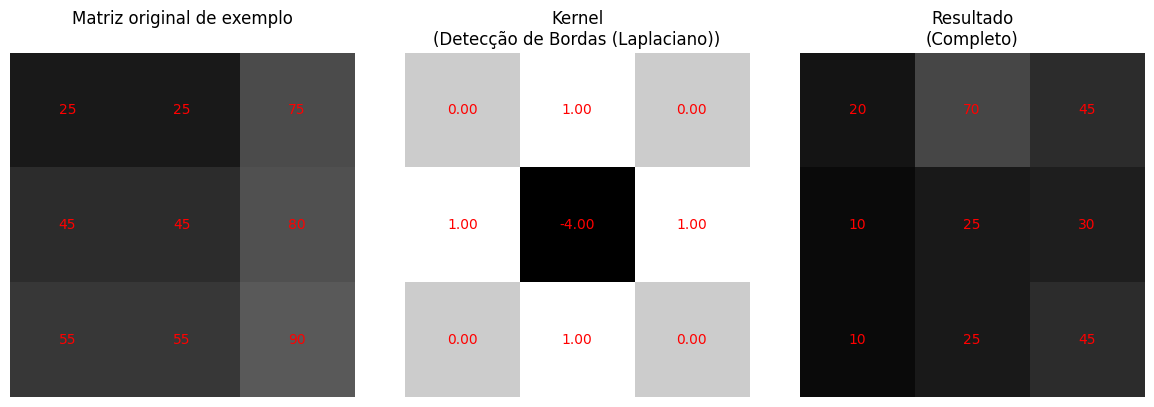


**Emboss**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Emboss):
[[-2 -1  0]
 [-1  1  1]
 [ 0  1  2]]

Cálculo detalhado por célula:
Pixel (0,0): 25×-2 + 25×-1 + 25×0 + 25×-1 + 25×1 + 25×1 + 45×0 + 45×1 + 45×2 = 85
Pixel (0,1): 25×-2 + 25×-1 + 75×0 + 25×-1 + 25×1 + 75×1 + 45×0 + 45×1 + 80×2 = 205
Pixel (0,2): 25×-2 + 75×-1 + 75×0 + 25×-1 + 75×1 + 75×1 + 45×0 + 80×1 + 80×2 = 240
Pixel (1,0): 25×-2 + 25×-1 + 25×0 + 45×-1 + 45×1 + 45×1 + 55×0 + 55×1 + 55×2 = 135
Pixel (1,1): 25×-2 + 25×-1 + 75×0 + 45×-1 + 45×1 + 80×1 + 55×0 + 55×1 + 90×2 = 240
Pixel (1,2): 25×-2 + 75×-1 + 75×0 + 45×-1 + 80×1 + 80×1 + 55×0 + 90×1 + 90×2 = 260
Pixel (2,0): 45×-2 + 45×-1 + 45×0 + 55×-1 + 55×1 + 55×1 + 55×0 + 55×1 + 55×2 = 85
Pixel (2,1): 45×-2 + 45×-1 + 80×0 + 55×-1 + 55×1 + 90×1 + 55×0 + 55×1 + 90×2 = 190
Pixel (2,2): 45×-2 + 80×-1 + 80×0 + 55×-1 + 90×1 + 90×1 + 55×0 + 90×1 + 90×2 = 225


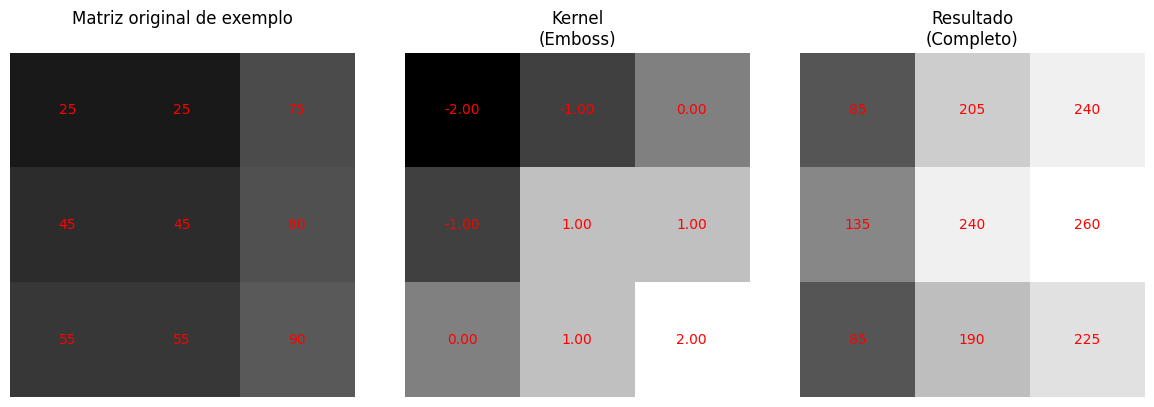


**Borda Horizontal (RCS)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Borda Horizontal (RCS)):
[[-1 -1 -1]
 [ 2  2  2]
 [-1 -1 -1]]

Cálculo detalhado por célula:
Pixel (0,0): 25×-1 + 25×-1 + 25×-1 + 25×2 + 25×2 + 25×2 + 45×-1 + 45×-1 + 45×-1 = 60
Pixel (0,1): 25×-1 + 25×-1 + 75×-1 + 25×2 + 25×2 + 75×2 + 45×-1 + 45×-1 + 80×-1 = 45
Pixel (0,2): 25×-1 + 75×-1 + 75×-1 + 25×2 + 75×2 + 75×2 + 45×-1 + 80×-1 + 80×-1 = 30
Pixel (1,0): 25×-1 + 25×-1 + 25×-1 + 45×2 + 45×2 + 45×2 + 55×-1 + 55×-1 + 55×-1 = 30
Pixel (1,1): 25×-1 + 25×-1 + 75×-1 + 45×2 + 45×2 + 80×2 + 55×-1 + 55×-1 + 90×-1 = 15
Pixel (1,2): 25×-1 + 75×-1 + 75×-1 + 45×2 + 80×2 + 80×2 + 55×-1 + 90×-1 + 90×-1 = 0
Pixel (2,0): 45×-1 + 45×-1 + 45×-1 + 55×2 + 55×2 + 55×2 + 55×-1 + 55×-1 + 55×-1 = 30
Pixel (2,1): 45×-1 + 45×-1 + 80×-1 + 55×2 + 55×2 + 90×2 + 55×-1 + 55×-1 + 90×-1 = 30
Pixel (2,2): 45×-1 + 80×-1 + 80×-1 + 55×2 + 90×2 + 90×2 + 55×-1 + 90×-1 + 90×-1 = 30


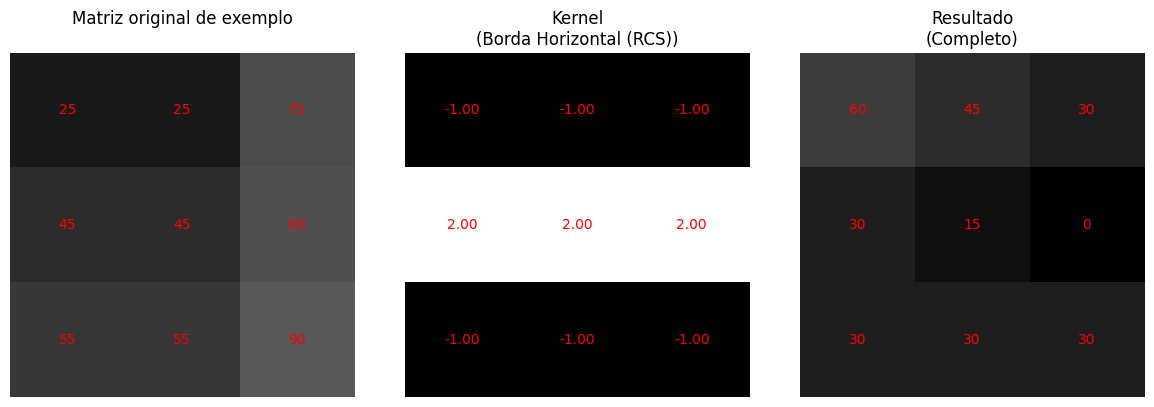


**Borda Vertical (RCS)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (Borda Vertical (RCS)):
[[-1  2 -1]
 [-1  2 -1]
 [-1  2 -1]]

Cálculo detalhado por célula:
Pixel (0,0): 25×-1 + 25×2 + 25×-1 + 25×-1 + 25×2 + 25×-1 + 45×-1 + 45×2 + 45×-1 = 0
Pixel (0,1): 25×-1 + 25×2 + 75×-1 + 25×-1 + 25×2 + 75×-1 + 45×-1 + 45×2 + 80×-1 = 135
Pixel (0,2): 25×-1 + 75×2 + 75×-1 + 25×-1 + 75×2 + 75×-1 + 45×-1 + 80×2 + 80×-1 = 135
Pixel (1,0): 25×-1 + 25×2 + 25×-1 + 45×-1 + 45×2 + 45×-1 + 55×-1 + 55×2 + 55×-1 = 0
Pixel (1,1): 25×-1 + 25×2 + 75×-1 + 45×-1 + 45×2 + 80×-1 + 55×-1 + 55×2 + 90×-1 = 120
Pixel (1,2): 25×-1 + 75×2 + 75×-1 + 45×-1 + 80×2 + 80×-1 + 55×-1 + 90×2 + 90×-1 = 120
Pixel (2,0): 45×-1 + 45×2 + 45×-1 + 55×-1 + 55×2 + 55×-1 + 55×-1 + 55×2 + 55×-1 = 0
Pixel (2,1): 45×-1 + 45×2 + 80×-1 + 55×-1 + 55×2 + 90×-1 + 55×-1 + 55×2 + 90×-1 = 105
Pixel (2,2): 45×-1 + 80×2 + 80×-1 + 55×-1 + 90×2 + 90×-1 + 55×-1 + 90×2 + 90×-1 = 105



**1Criada aleatrmente p/ mim (RCS)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (1Criada aleatrmente p/ mim (RCS)):
[[ 2  1  0]
 [-1  5  1]
 [ 0  1  2]]

Cálculo detalhado por célula:
Pixel (0,0): 25×2 + 25×1 + 25×0 + 25×-1 + 25×5 + 25×1 + 45×0 + 45×1 + 45×2 = 335
Pixel (0,1): 25×2 + 25×1 + 75×0 + 25×-1 + 25×5 + 75×1 + 45×0 + 45×1 + 80×2 = 455
Pixel (0,2): 25×2 + 75×1 + 75×0 + 25×-1 + 75×5 + 75×1 + 45×0 + 80×1 + 80×2 = 790
Pixel (1,0): 25×2 + 25×1 + 25×0 + 45×-1 + 45×5 + 45×1 + 55×0 + 55×1 + 55×2 = 465
Pixel (1,1): 25×2 + 25×1 + 75×0 + 45×-1 + 45×5 + 80×1 + 55×0 + 55×1 + 90×2 = 570
Pixel (1,2): 25×2 + 75×1 + 75×0 + 45×-1 + 80×5 + 80×1 + 55×0 + 90×1 + 90×2 = 830
Pixel (2,0): 45×2 + 45×1 + 45×0 + 55×-1 + 55×5 + 55×1 + 55×0 + 55×1 + 55×2 = 575
Pixel (2,1): 45×2 + 45×1 + 80×0 + 55×-1 + 55×5 + 90×1 + 55×0 + 55×1 + 90×2 = 680
Pixel (2,2): 45×2 + 80×1 + 80×0 + 55×-1 + 90×5 + 90×1 + 55×0 + 90×1 + 90×2 = 925


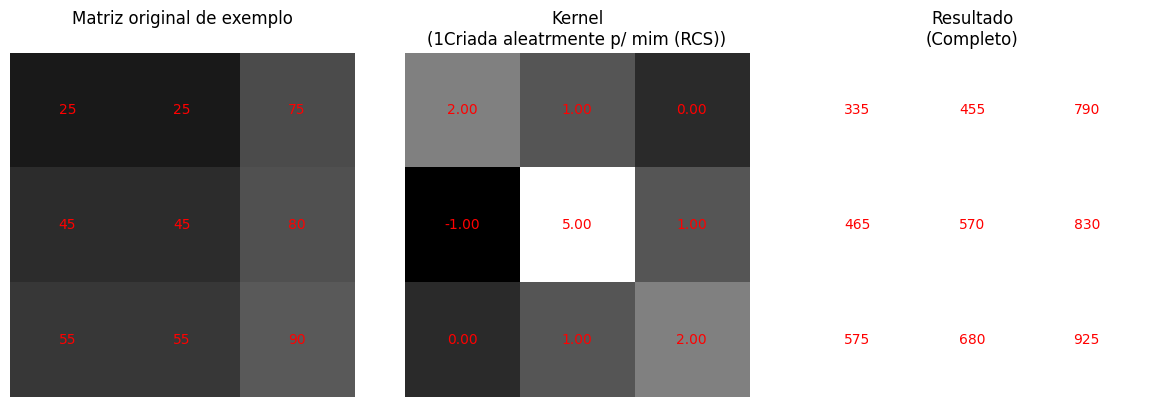


**2Criada aleatrmnte p/ mim (RCS)**
Matriz Original (Canal R):
[[25 25 75]
 [45 45 80]
 [55 55 90]]

Kernel (2Criada aleatrmnte p/ mim (RCS)):
[[ 2  1  2]
 [ 1 -5 -1]
 [ 2 -1  2]]

Cálculo detalhado por célula:
Pixel (0,0): 25×2 + 25×1 + 25×2 + 25×1 + 25×-5 + 25×-1 + 45×2 + 45×-1 + 45×2 = 135
Pixel (0,1): 25×2 + 25×1 + 75×2 + 25×1 + 25×-5 + 75×-1 + 45×2 + 45×-1 + 80×2 = 255
Pixel (0,2): 25×2 + 75×1 + 75×2 + 25×1 + 75×-5 + 75×-1 + 45×2 + 80×-1 + 80×2 = 20
Pixel (1,0): 25×2 + 25×1 + 25×2 + 45×1 + 45×-5 + 45×-1 + 55×2 + 55×-1 + 55×2 = 65
Pixel (1,1): 25×2 + 25×1 + 75×2 + 45×1 + 45×-5 + 80×-1 + 55×2 + 55×-1 + 90×2 = 200
Pixel (1,2): 25×2 + 75×1 + 75×2 + 45×1 + 80×-5 + 80×-1 + 55×2 + 90×-1 + 90×2 = 40
Pixel (2,0): 45×2 + 45×1 + 45×2 + 55×1 + 55×-5 + 55×-1 + 55×2 + 55×-1 + 55×2 = 115
Pixel (2,1): 45×2 + 45×1 + 80×2 + 55×1 + 55×-5 + 90×-1 + 55×2 + 55×-1 + 90×2 = 220
Pixel (2,2): 45×2 + 80×1 + 80×2 + 55×1 + 90×-5 + 90×-1 + 55×2 + 90×-1 + 90×2 = 45


In [74]:
import numpy as np
import matplotlib.pyplot as plt

print("### Demonstração Matemática das Convoluções com Exemplos Aleatórios ###\n")
print("Para cada kernel, geramos uma matriz 3x3 (canal R) e calculamos a convolução")
print("em **todas as células**, exibindo: a) Matriz original, b) Kernel, c) Resultado completo.\n")

# Função para convolução 2D com padding
def full_convolution(image, kernel):
    padded_image = np.pad(image, pad_width=1, mode='edge')
    output = np.zeros_like(image, dtype=np.float32)
    calc_map = [[[] for _ in range(3)] for _ in range(3)]

    for i in range(3):
        for j in range(3):
            region = padded_image[i:i+3, j:j+3]
            result = np.sum(region * kernel)
            #output[i, j] = np.clip(result, 0, 255)
            output[i, j] = np.abs(result)
            calc_map[i][j] = [
                f"{int(region[m, n])}×{kernel[m, n]}"
                for m in range(3) for n in range(3)
            ]

    return output, calc_map

# Iterando sobre cada kernel
for name, kernel in kernels.items():
    print(f"\n**{name}**")

    demo_image = np.array([
        [25, 25, 75],
        [45, 45, 80],
        [55, 55, 90]
    ])

    result_image, calc_map = full_convolution(demo_image, kernel)

    print("Matriz Original (Canal R):")
    print(demo_image.astype(int))

    print(f"\nKernel ({name}):")
    print(kernel)

    print(f"\nCálculo detalhado por célula:")
    for i in range(3):
        for j in range(3):
            print(f"Pixel ({i},{j}): " + " + ".join(calc_map[i][j]) + f" = {int(result_image[i,j])}")

    # Visualização
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Matriz Original
    axes[0].imshow(demo_image, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title(f'Matriz original de exemplo\n')
    axes[0].axis('off')
    for i in range(3):
        for j in range(3):
            axes[0].text(j, i, f'{demo_image[i,j]}', ha='center', va='center', color='red')

    # Kernel
    axes[1].imshow(kernel, cmap='gray')
    axes[1].set_title(f'Kernel\n({name})')
    axes[1].axis('off')
    for i in range(3):
        for j in range(3):
            axes[1].text(j, i, f'{kernel[i,j]:.2f}', ha='center', va='center', color='red')

    # Resultado
    axes[2].imshow(result_image, cmap='gray', vmin=0, vmax=255)
    axes[2].set_title(f'Resultado\n(Completo)')
    axes[2].axis('off')
    for i in range(3):
        for j in range(3):
            axes[2].text(j, i, f'{int(result_image[i,j])}', ha='center', va='center', color='red')

    plt.tight_layout()
    plt.show()
